In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from imblearn.over_sampling import RandomOverSampler

In [2]:
df = pd.read_csv("C:/Users/Owen/Downloads/diabetes_yt.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


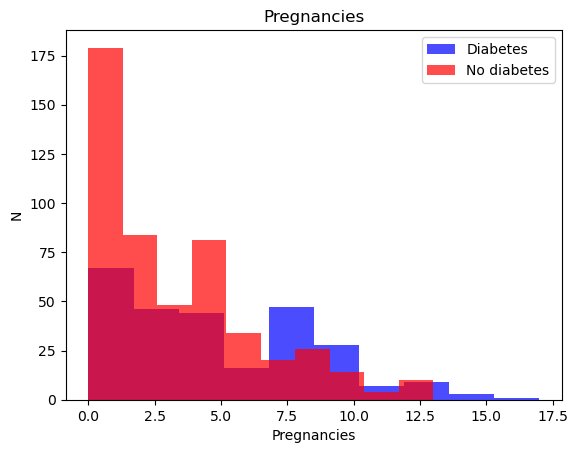

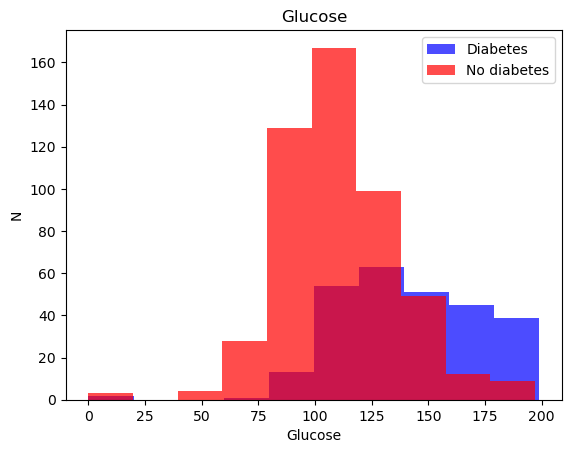

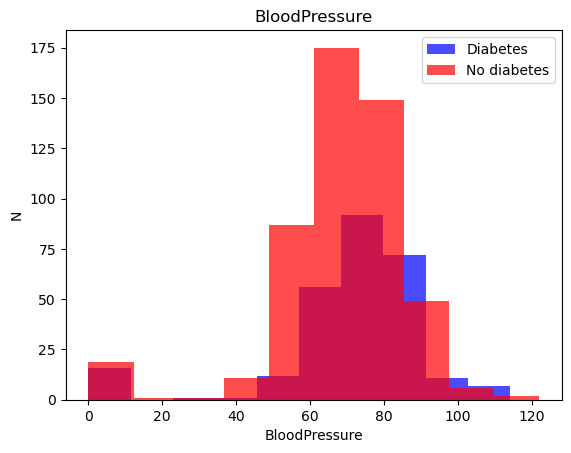

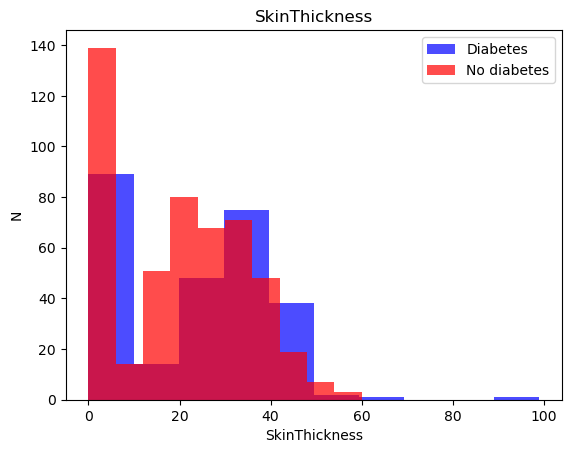

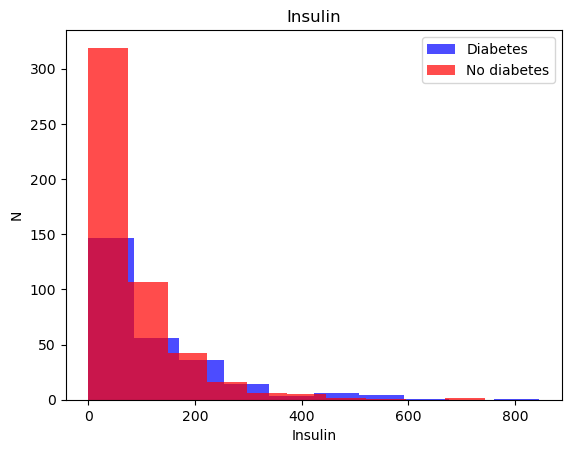

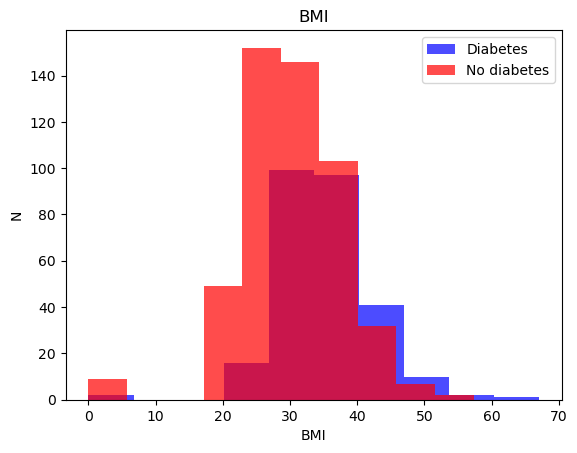

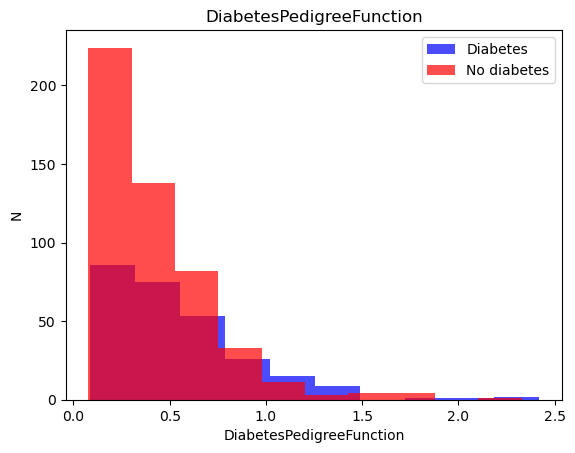

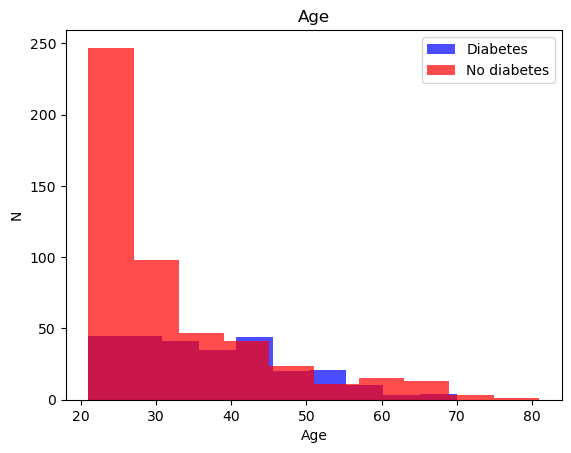

In [3]:
for i in range(len(df.columns[:-1])) :
    label = df.columns[i]
    plt.hist(df[df['Outcome'] == 1][label], color='blue', label='Diabetes', alpha=0.7)
    plt.hist(df[df['Outcome'] == 0][label], color='red', label='No diabetes', alpha=0.7)
    plt.title(label)
    plt.ylabel('N')
    plt.xlabel(label)
    plt.legend()
    plt.show()

In [4]:
len(df[df['Outcome'] == 1]), len(df[df['Outcome'] == 0])

(268, 500)

In [7]:
X = df[df.columns[:-1]].values
y = df[df.columns[-1]].values

In [11]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
data = np.hstack((X, np.reshape(y, (-1, 1))))
transformed_df = pd.DataFrame(data, columns=df.columns)

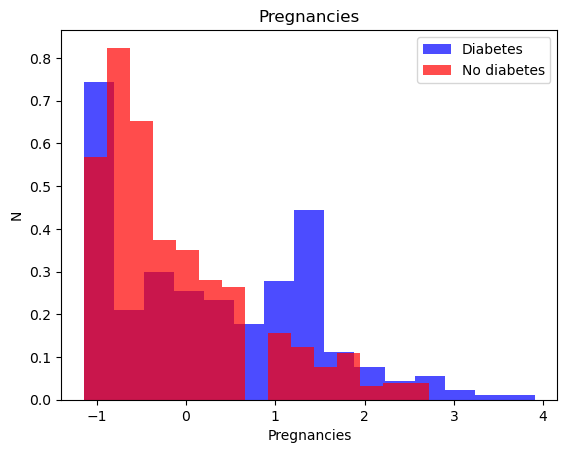

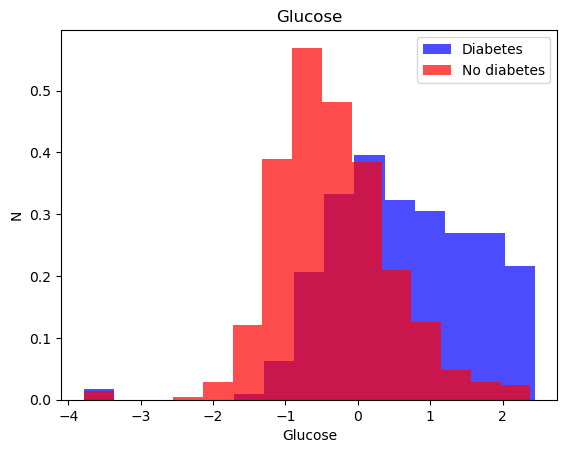

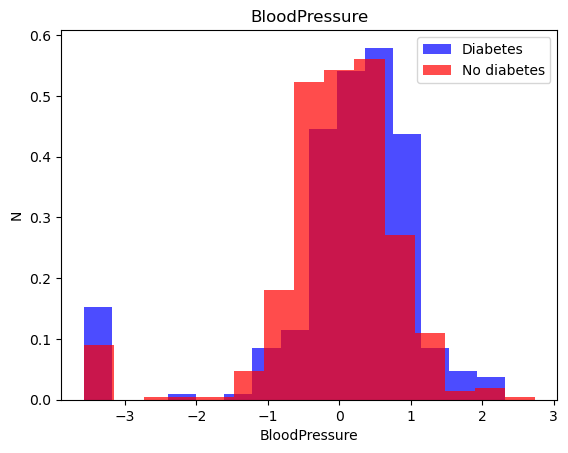

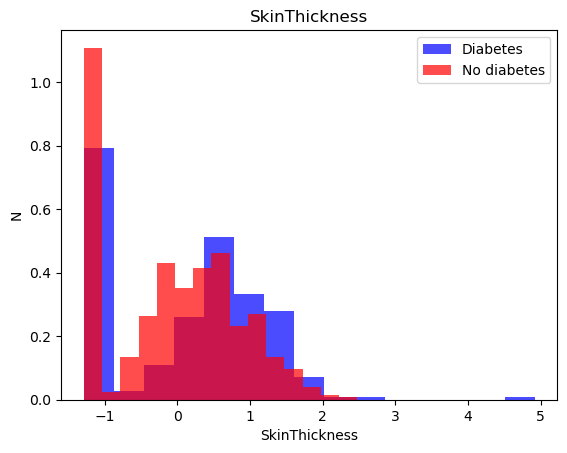

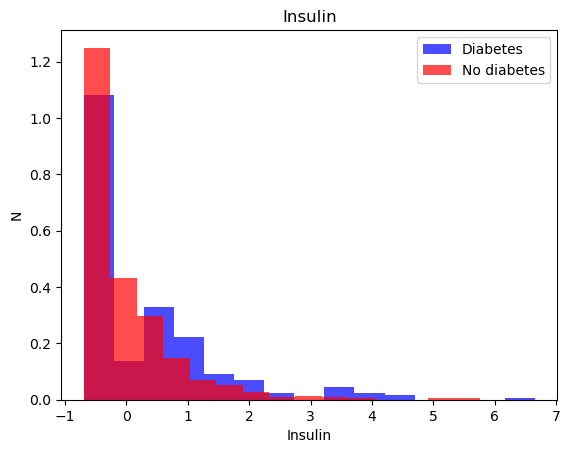

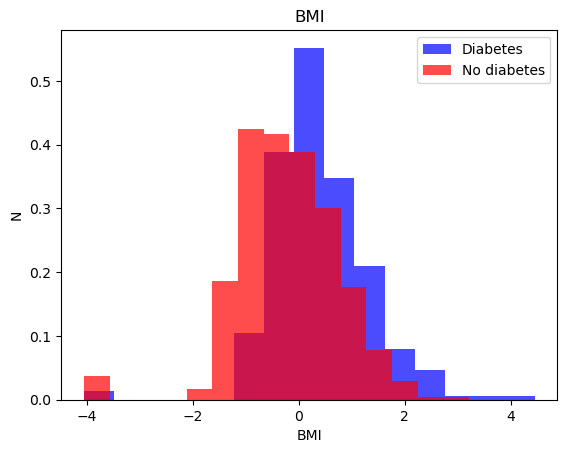

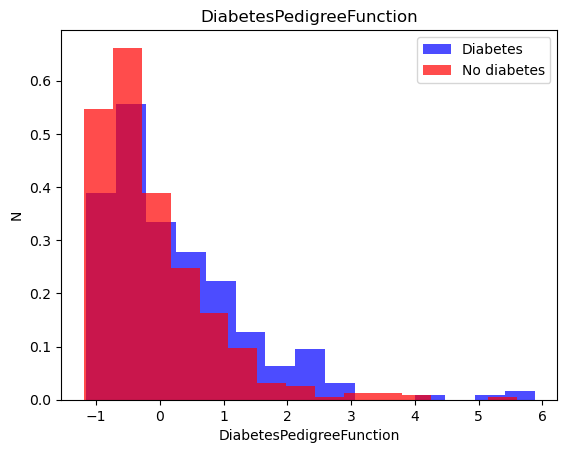

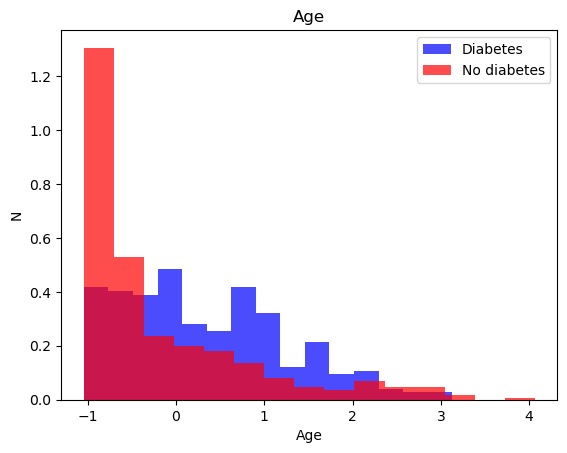

In [13]:
for i in range(len(df.columns[:-1])) :
    label = df.columns[i]
    plt.hist(transformed_df[transformed_df['Outcome'] == 1][label], color='blue', label='Diabetes', alpha=0.7, density=True, bins=15)
    plt.hist(transformed_df[transformed_df['Outcome'] == 0][label], color='red', label='No diabetes', alpha=0.7, density= True, bins=15)
    plt.title(label)
    plt.ylabel('N')
    plt.xlabel(label)
    plt.legend()
    plt.show()

In [37]:
#Bikin balance "Output (y) 500/500"

over = RandomOverSampler()
X, y = over.fit_resample(X, y)
data = np.hstack((X, np.reshape(y, (-1, 1))))
transformed_df = pd.DataFrame(data, columns=df.columns)

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=0)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)

In [39]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(16, activation='relu'),
                             tf.keras.layers.Dense(16, activation= 'relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')
])

In [41]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
             loss=tf.keras.losses.BinaryCrossentropy(),
             metrics=['accuracy'])

In [43]:
model.evaluate(X_train, y_train)

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4236 - loss: 0.7481  


[0.7438265085220337, 0.43478259444236755]

In [45]:
model.evaluate(X_valid, y_valid)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4618 - loss: 0.7180 


[0.7153337001800537, 0.4740259647369385]

In [47]:
model.fit(X_train, y_train, batch_size=16, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4691 - loss: 0.7361 - val_accuracy: 0.6364 - val_loss: 0.6681
Epoch 2/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5849 - loss: 0.6847 - val_accuracy: 0.6883 - val_loss: 0.6357
Epoch 3/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6796 - loss: 0.6286 - val_accuracy: 0.7078 - val_loss: 0.6095
Epoch 4/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6620 - loss: 0.6065 - val_accuracy: 0.6948 - val_loss: 0.5857
Epoch 5/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7103 - loss: 0.5670 - val_accuracy: 0.7143 - val_loss: 0.5652
Epoch 6/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7303 - loss: 0.5368 - val_accuracy: 0.6948 - val_loss: 0.5494
Epoch 7/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7004 - loss: 0.5619 - val_accuracy: 0.7078 - val_loss: 0.5353
Epoch 8/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7269 - loss: 0.5247 - val_accuracy: 0.7078 - val_loss:

In [49]:
model.evaluate(X_test, y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7732 - loss: 0.4476 


[0.4308915436267853, 0.7922077775001526]